<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Martin_lightGBM_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# renamed from covid-19_V1_2_P_New_Base_Martin_cleaning.ipynb

# Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time

In [2]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!rm -r curated_data
!rm meta_data_cap.csv
!rm meta_data_covid.csv
!rm meta_data_normal.csv

rm: cannot remove 'curated_data': No such file or directory
rm: cannot remove 'meta_data_cap.csv': No such file or directory
rm: cannot remove 'meta_data_covid.csv': No such file or directory
rm: cannot remove 'meta_data_normal.csv': No such file or directory


In [4]:
%cd /content/

!unzip '/content/drive/.shortcut-targets-by-id/1lp7vo6EG60jba1Gk_tuNpvDm7q5ZXlKX/Telecom_Specialization_ML3/Students/Peter_Christoph_Marko_Martin/data/archive.zip'

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: curated_data/curated_data/2COVID/P024_121.png  
  inflating: curated_data/curated_data/2COVID/P024_122.png  
  inflating: curated_data/curated_data/2COVID/P024_123.png  
  inflating: curated_data/curated_data/2COVID/P024_124.png  
  inflating: curated_data/curated_data/2COVID/P024_125.png  
  inflating: curated_data/curated_data/2COVID/P024_127.png  
  inflating: curated_data/curated_data/2COVID/P024_128.png  
  inflating: curated_data/curated_data/2COVID/P024_129.png  
  inflating: curated_data/curated_data/2COVID/P024_130.png  
  inflating: curated_data/curated_data/2COVID/P024_131.png  
  inflating: curated_data/curated_data/2COVID/P024_132.png  
  inflating: curated_data/curated_data/2COVID/P024_133.png  
  inflating: curated_data/curated_data/2COVID/P024_134.png  
  inflating: curated_data/curated_data/2COVID/P024_135.png  
  inflating: curated_data/curated_data/2COVID/P024_136.png  
  inflating: curat

In [5]:
##### Inconsistency between file names and file names in meta data #####
## ==> rename files to the names used in meta_data_covid.csv
!mv "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%0.png" "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-COVID-19-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%0.png"

!mv "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png" "/content/curated_data/curated_data/2COVID/17_Zhao_Recurrence-of-COVID-19-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png"

In [6]:
#17_Zhao_Recurrence-of-COVID-19-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%0

In [7]:
# Load data as dataframes
df_meta_cap = pd.read_csv('meta_data_cap.csv')
df_meta_covid = pd.read_csv('meta_data_covid.csv', encoding = "ISO-8859-1")
df_meta_normal = pd.read_csv('meta_data_normal.csv')

# Data analysis

### Analysis of df_meta_cap

In [8]:
# Get some information about df_meta_cap
print(df_meta_cap.info())
display(df_meta_cap.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        2618 non-null   int64  
 1   File name                    2618 non-null   object 
 2   Patient ID                   2618 non-null   object 
 3   Slices_x                     2618 non-null   int64  
 4   Columns                      2618 non-null   int64  
 5   Date of Last Calibration     2618 non-null   int64  
 6   Diagnosis                    2618 non-null   object 
 7   Distance Source to Detector  2618 non-null   int64  
 8   Distance Source to Patient   2618 non-null   int64  
 9   Exposure Time                2618 non-null   int64  
 10  KVP                          2618 non-null   int64  
 11  Age                          2618 non-null   int64  
 12  Gender                       2618 non-null   object 
 13  Rows              

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country
0,0,cap006_10.png,cap006,10,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
1,1,cap006_11.png,cap006,11,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
2,2,cap006_12.png,cap006,12,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
3,3,cap006_14.png,cap006,14,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran
4,4,cap006_15.png,cap006,15,512,20180921,CAP,940,535,600,110,71,M,512,2,172,20180922,254,1 days 00:00:00.000000000,152.4,Iran


In [9]:
df_meta_cap.loc[df_meta_cap.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Slices_x,Columns,Date of Last Calibration,Diagnosis,Distance Source to Detector,Distance Source to Patient,Exposure Time,KVP,Age,Gender,Rows,Slice Thickness,Slices_y,Study Date,XRayTubeCurrent,Last Calibration,mAs,Country


In [10]:
df_meta_cap['Country'].unique()     # unique countries

array(['Iran'], dtype=object)

In [11]:
df_meta_cap['Patient ID'].nunique() # number of unique patients

54

In [12]:
df_meta_cap['Age'].unique()         # unique ages

array([71, 54, 38, 68, 84, 65, 94, 44, 29, 87, 13, 59, 40, 52, 34, 22, 32,
       25, 80, 46, 70, 21, 51, 30, 26, 76, 56, 62, 77, 75, 39, 83, 48, 73,
       74, 55, 93, 37, 89, 58, 67, 12])

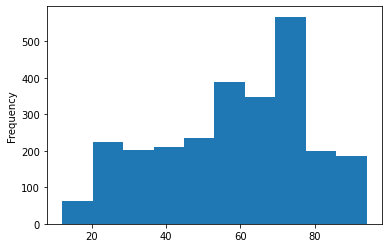

In [13]:
# Display age distribution
df_meta_cap.Age.plot(kind='hist')
plt.show()

### Analysis of df_meta_covid

In [14]:
df_meta_covid.loc[df_meta_covid.duplicated(),:]  # get duplicates

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu


In [15]:
# Get some information about df_meta_covid
print(df_meta_covid.info())
display(df_meta_covid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7593 non-null   int64  
 1   File name                    7593 non-null   object 
 2   Patient ID                   7593 non-null   object 
 3   Gender                       7593 non-null   object 
 4   Age                          7593 non-null   object 
 5   Country                      7593 non-null   object 
 6   Diagnosis                    7593 non-null   object 
 7   Slice                        7210 non-null   float64
 8   Case Discussion              493 non-null    object 
 9   Case Number                  1944 non-null   object 
 10  Columns                      3815 non-null   float64
 11  Date                         4491 non-null   object 
 12  Date of Last Calibration     3815 non-null   float64
 13  Distance Source to

,index,File name,Patient ID,Gender,Age,Country,Diagnosis,Slice,Case Discussion,Case Number,Columns,Date,Date of Last Calibration,Distance Source to Detector,Distance Source to Patient,Exposure Time,Image Source,Institution,KVP,Last Calibration,Link,Link2,Other diseases,Presentation,RT_PCR_COVID-19,Rows,Severity,Slice Thickness,Slices,Source_detail,Time,XRayTubeCurrent,category,doi,finding,in_icu,intubated,intubation_present,license,mAs,mask_file,needed_supplemental_O2,study_file,survival,went_icu
0,0,6_Rahimzadeh_137covid_patient101_SR_4_IM00006.png,patient101,F,51,Iran,COVID-19,6.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6_Rahimzadeh_137covid_patient101_SR_4_IM00008.png,patient101,F,51,Iran,COVID-19,8.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6_Rahimzadeh_137covid_patient101_SR_4_IM00009.png,patient101,F,51,Iran,COVID-19,9.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6_Rahimzadeh_137covid_patient101_SR_4_IM00010.png,patient101,F,51,Iran,COVID-19,10.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6_Rahimzadeh_137covid_patient101_SR_4_IM00011.png,patient101,F,51,Iran,COVID-19,11.0,NaN,NaN,NaN,20200328,NaN,NaN,NaN,NaN,NaN,Negin radiology located at Sari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_meta_covid['Country'].unique()     # unique countries

array(['Iran', 'Italy', 'China', '-', 'Turkey', 'Ukraine', 'Belgium',
       'South Korea', 'Taiwan', 'Spain', 'Portugal', 'Greece', 'Russia',
       'Japan'], dtype=object)

In [17]:
df_meta_covid['Patient ID'].nunique() # number of unique patients

464

### Analysis of df_meta_normal

## Split data into training, valdiation and test data

In [18]:
np.random.seed(42)

# Configuration of sizes
test_size = 0.1
validation_size = 0.1

# List of classes
classes_list = [('1NonCOVID','NonCOVID'), 
                ('2COVID','COVID'), 
                ('3CAP','CAP')]

In [19]:
# Get patient to image mappings

# Covid patients
covid_patient_to_image = df_meta_covid.groupby(['Patient ID'])['File name'].apply(list).reset_index()
# Normal patients
normal_patient_to_image = df_meta_normal.groupby(['Patient ID'])['File name'].apply(list).reset_index()
# CAP patients
cap_patient_to_image = df_meta_cap.groupby(['Patient ID'])['File name'].apply(list).reset_index()

In [20]:
def split_ids(patient_to_image, val_size, test_size):
  '''
  '''
  # Calculate the number of training, valdiation and test samples
  len_all = len(patient_to_image)
  nb_test = np.floor(len_all * test_size).astype('int')
  nb_val = np.floor(len_all * val_size).astype('int')
  nb_train = len_all - (nb_test + nb_val).astype('int')
  # Create sub-samples of patient_to_image
  patient_ids = patient_to_image.index.values
  train_ids = np.random.choice(patient_ids, nb_train, replace=False)
  val_ids = np.random.choice(list(set(patient_ids)-set(train_ids)), nb_val, 
                             replace=False)
  test_ids = np.random.choice(list(set(patient_ids)-set(train_ids)-set(val_ids)),
                              nb_test, replace = False)
  
  return train_ids, val_ids, test_ids

In [21]:
# Split data into training, validation and test subsets

sample_id_dict = {}

for _, cl_dest in classes_list:
  if cl_dest == 'COVID':
    # Split covid patients
    covid_train_ids, covid_val_ids, covid_test_ids = \
      split_ids(covid_patient_to_image, validation_size, test_size)
    
    # Add data to dictionary
    sample_id_dict[cl_dest] = {'IMG':covid_patient_to_image,
                               'TRAIN':covid_train_ids,
                               'VAL':covid_val_ids,
                               'TEST':covid_test_ids}
  elif cl_dest == 'NonCOVID':
    # Split normal patients
    norm_train_ids, norm_val_ids, norm_test_ids = \
      split_ids(normal_patient_to_image, validation_size, test_size)
    # Add data to dictionary
    sample_id_dict[cl_dest] = {'IMG':normal_patient_to_image,
                               'TRAIN':norm_train_ids,
                               'VAL':norm_val_ids,
                               'TEST':norm_test_ids}
  else: # CAP
    # Split cap patients
    cap_train_ids, cap_val_ids, cap_test_ids = \
      split_ids(cap_patient_to_image, validation_size, test_size)
    # Add data to dictionary
    sample_id_dict[cl_dest] = {'IMG':cap_patient_to_image,
                               'TRAIN':cap_train_ids,
                               'VAL':cap_val_ids,
                               'TEST':cap_test_ids}


#print(len(covid_train_ids), len(covid_val_ids), len(covid_test_ids))
#print(len(norm_train_ids), len(norm_val_ids), len(norm_test_ids))
#print(len(cap_train_ids), len(cap_val_ids), len(cap_test_ids))

In [22]:
# Create directories
source_dir = '/content/curated_data/curated_data/'
train_dir = str(source_dir + 'train/')
test_dir = str(source_dir + 'test/')
validation_dir = str(source_dir + 'validation/')
!mkdir $train_dir
!mkdir $test_dir
!mkdir $validation_dir

# Create subdirectories for each class
for _, cl in classes_list:
  c_train = str(train_dir + cl)
  !mkdir $c_train
  c_test = str(test_dir + cl)
  !mkdir $c_test
  c_validation = str(validation_dir + cl)
  !mkdir $c_validation

In [23]:
def move_files(patient_to_image, patient_ids, from_dir, to_dir):
  '''
  '''
  # Set a limit to mv-strings
  MAX_LEN = 20000

  # Check if at least one patient id was provided
  if len(patient_to_image) < 1:
    print('No files to move!')
    return None

  fs_to_move_stack = []
  fs_to_move = ''
  for id in patient_ids:
    file_names = f' {from_dir}'.join([fn for fn in patient_to_image.at[id,'File name']])
    # Extend fs_to_move by new file names and from_dir at the beginning
    fs_to_move = fs_to_move + f' {from_dir}' + file_names
    if len(fs_to_move) > MAX_LEN:
      fs_to_move_stack.append(fs_to_move)
      fs_to_move = ''
  # Append the last fs_to_move string to the file_stack
  fs_to_move_stack.append(fs_to_move)
  for fs_to_move in fs_to_move_stack:
    !mv $fs_to_move $to_dir 


In [24]:
# Move all data to new destinations
%%time

for cl_src, cl_dest in classes_list:
  from_dir = source_dir + cl_src + '/'
  
  imgs = sample_id_dict[cl_dest]['IMG']

  # Move training data
  to_dir = train_dir + cl_dest
  ids = sample_id_dict[cl_dest]['TRAIN']
  move_files(imgs, ids, from_dir, to_dir)
  #print(to_dir)
  #print(len(ids))

  # Move validation data
  to_dir = validation_dir + cl_dest
  ids = sample_id_dict[cl_dest]['VAL']
  move_files(imgs, ids, from_dir, to_dir)
  #print(to_dir)
  #print(len(ids))

  # Move test data
  to_dir = test_dir + cl_dest
  ids = sample_id_dict[cl_dest]['TEST']
  move_files(imgs, ids, from_dir, to_dir)
  #print(to_dir)
  #print(len(ids))
  

CPU times: user 340 ms, sys: 480 ms, total: 821 ms
Wall time: 6.99 s


# lightGBM

In [25]:
from timeit import default_timer as timer

In [26]:
import os
import cv2
import numpy as np

In [27]:
import glob
source_dir = '/content/curated_data/curated_data/'
train_dir = str(source_dir + 'train/')
test_dir = str(source_dir + 'test/')
validation_dir = str(source_dir + 'validation/')
data_format = '/*.png'

In [28]:
!find '/content/curated_data/curated_data/test' -type f | wc -l

1777


In [29]:
!find '/content/curated_data/curated_data/train' -type f | wc -l

13568


In [30]:
!find '/content/curated_data/curated_data/validation' -type f | wc -l

1759


In [31]:
#dict_case_df.keys()
dict_case_lst = ['NonCOVID', 'COVID', 'CAP']

## train

In [32]:
def load_imagelist_label(dir):
  lgbm_list = []
  lgbm_label = []

  for case in dict_case_lst:#dict_case_df.keys():
    file_list = glob.glob(os.path.join(dir, case + data_format))
    
    for f in range(len(file_list)):  
      img = cv2.imread(file_list[f], cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (224, 224))# uncommit for final
      lgbm_list.append(img)
      lgbm_label.append(case)

  return lgbm_list,lgbm_label    

lgbm_list,lgbm_label = load_imagelist_label(train_dir)  

In [33]:
lgbm_array = np.array(lgbm_list)

In [34]:
lgbm_array.shape

(13568, 224, 224)

In [35]:
lgbm_array.shape

(13568, 224, 224)

In [36]:
lgbm_array = lgbm_array / 255.0

In [37]:
lgbm_array.shape

(13568, 224, 224)

In [38]:
lgbm_label = np.array(lgbm_label)

In [39]:
#from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(multi_class='ovr')

In [40]:
lgbm_array.reshape(lgbm_array.shape[0], -1).shape

(13568, 50176)

In [41]:
#clf.fit(lr_array.reshape(lr_array.shape[0], -1), lr_label)

## fit

In [42]:
import lightgbm as lgb

#lgbm = lgb.LGBMClassifier(random_state=42)

In [43]:
from timeit import default_timer as timer
start = timer()

In [44]:
#from sklearn.model_selection import GridSearchCV

#lgbm = lgb.LGBMClassifier(**params,random_state=42)

#params = {"learning_rate": [0.01],#[0.01, 0.05, 0.1]
#          "num_leaves": [10],#[10, 20, 30]
#          "max_depth": [5],#[2, 5, 10]
#          "n_estimators": [50]}#[50, 100, 150]

#grid_search = GridSearchCV(lgbm, n_jobs=-1, param_grid=params, cv=3, scoring="neg_log_loss")
#grid_search.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label)

In [45]:
#callbacks=[lgb.reset_parameter(learning_rate= lambda current_round: 0.1 * np.exp(-0.001 * current_round))]

In [46]:
#grid_search.best_params_

In [47]:
#grid_search.best_score_

In [48]:
#lgbm = grid_search.best_estimator_
#compute_logloss(lgbm, X_train, X_test, y_train, y_test)

In [49]:
params = {#'learning_rate': 0.05, 
          'max_depth': 5, #5
          'num_leaves': 10, 
          'n_estimators': 100}
          #,'objective': 'binary'}

In [ ]:
#lgbm_label

In [50]:
#lgbm.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label,callbacks=[lgb.reset_parameter(learning_rate= lambda current_round: 0.1 * np.exp(-0.001 * current_round))])
lgbm = lgb.LGBMClassifier(**params,random_state=42)
lgbm.fit(lgbm_array.reshape(lgbm_array.shape[0], -1), lgbm_label)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:




end = timer()

print(f"Training LGBM took {end-start: .2f} seconds")

Training LGBM took  944.31 seconds


In [52]:
#shoud stop here,
#try train validat than test overriding variable memory removing 

In [53]:
 y_pred = lgbm.predict(lgbm_array.reshape(lgbm_array.shape[0], -1))

In [54]:
y_pred

array(['NonCOVID', 'NonCOVID', 'NonCOVID', ..., 'CAP', 'CAP', 'CAP'],
      dtype='<U8')

In [55]:
len(lgbm_label)

13568

In [56]:
import sklearn.metrics as met
met.accuracy_score(lgbm_label, y_pred)

0.9840064858490566

In [57]:
import sklearn.metrics as met
#def compute_logloss_train(model, X_train,y_train):
  
  #print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
  #print(f"Log loss test set: {met.log_loss(y_test, model.predict_proba(X_test)[:,1]): .4f}")

  ### martin add start
  #print("\n add by martin")
  #print(f"Training accuracy: \t{met.accuracy_score(y_train, model.predict(X_train)) : .4f}")
  #print(f"Test accuracy: \t\t{met.accuracy_score(y_test,  model.predict(X_test)): .4f}")

In [58]:
#compute_logloss_train(lgbm,lgbm_array.reshape(lgbm_array.shape[0], -1),lgbm_label)

In [59]:
y_train =  lgbm_label

## test

In [60]:
test_dir

'/content/curated_data/curated_data/test/'

In [61]:
lgbm_list,lgbm_label = load_imagelist_label(test_dir) 

In [62]:
lgbm_array_test = np.array(lgbm_list)

In [63]:
lgbm_array_test.shape

(1777, 224, 224)

In [64]:
lgbm_array_test = lgbm_array_test / 255.0

In [65]:
lgbm_array_test.shape

(1777, 224, 224)

In [66]:
lgbm_label_test = np.array(lgbm_label)

In [67]:
lgbm_array_test.reshape(lgbm_array_test.shape[0], -1).shape

(1777, 50176)

In [68]:
 y_pred_test = lgbm.predict(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))

In [69]:
met.accuracy_score(lgbm_label_test, y_pred_test)

0.7433877321328081

In [100]:
from sklearn.metrics import log_loss

In [101]:
log_loss(y_pred_test,lgbm.predict_proba(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))  )

0.20083378194001428

## validate

In [70]:
validation_dir

'/content/curated_data/curated_data/validation/'

In [71]:
lgbm_list,lgbm_label = load_imagelist_label(validation_dir) 

In [72]:
lgbm_array_validation = np.array(lgbm_list)

In [73]:
lgbm_array_validation = lgbm_array_validation / 255.0

In [74]:
lgbm_label_validation = np.array(lgbm_label)

In [75]:
lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1).shape

(1759, 50176)

In [76]:
 y_pred_validation = lgbm.predict(lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1))

In [77]:
met.accuracy_score(lgbm_label_validation, y_pred_validation)

0.7663445139283684

In [102]:
log_loss(y_pred_validation,lgbm.predict_proba(lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1)))

0.25879546803333786

In [78]:
import sklearn.metrics as met
def compute_logloss_train(model, X_train, X_test, y_train, y_test):
  
  print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
  print(f"Log loss test set: {met.log_loss(y_test, model.predict_proba(X_test)[:,1]): .4f}")

  ### martin add start
  print("\n add by martin")
  print(f"Training accuracy: \t{met.accuracy_score(y_train, model.predict(X_train)) : .4f}")
  print(f"Test accuracy: \t\t{met.accuracy_score(y_test,  model.predict(X_test)): .4f}")
  ### martin add stop

In [79]:
#compute_logloss(lgbm,lgbm_array.reshape(lr_array.shape[0], -1),lgbm_array_test.reshape(lgbm_array_test.shape[0], -1),lgbm_label,lgbm_label_test)

In [80]:
y_pred_train = lgbm.predict(lgbm_array.reshape(lgbm_array.shape[0], -1))
y_pred_test = lgbm.predict(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))
y_prob_train = lgbm.predict_proba(lgbm_array.reshape(lgbm_array.shape[0], -1))[:,1]
y_prob_test = lgbm.predict_proba(lgbm_array_test.reshape(lgbm_array_test.shape[0], -1))[:,1]

#print(f"Log loss training set: {met.log_loss(df_train['target'], y_prob_train)}")
#print(f"Log loss test set: {met.log_loss(df_test['target'], y_prob_test)}")

In [81]:
y_prob_test

array([0.03024917, 0.01955917, 0.04087532, ..., 0.77027084, 0.66220951,
       0.57183758])

In [82]:
from sklearn.metrics import log_loss

In [83]:
#log_loss(lgbm, lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1), lgbm_label)

In [84]:
#print(f"Log loss train set: {met.log_loss(y_train, model.predict_proba(X_train)[:,1]): .4f}")
#print(f"Log loss test set: {met.log_loss(lgbm_label_test, y_prob_test): .4f}")

In [85]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

def plot_confusion_matrix_x(labels,predictions,classes_name):
  """
  example:
  predictions=max_predict # np.argmax(y_predict, axis=-1)
  labels=test_generator.classes
  classes_name = artist_list
  """
  con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,index = classes_name,columns = classes_name)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [86]:
lgbm_label_test

array(['NonCOVID', 'NonCOVID', 'NonCOVID', ..., 'CAP', 'CAP', 'CAP'],
      dtype='<U8')

In [87]:
dict_case_lst

['NonCOVID', 'COVID', 'CAP']

In [88]:
y_pred_test

array(['NonCOVID', 'NonCOVID', 'NonCOVID', ..., 'COVID', 'COVID', 'COVID'],
      dtype='<U8')

In [89]:
from sklearn.metrics import classification_report
report = classification_report(lgbm_label_test, y_pred_test, target_names=dict_case_lst)
print(report)

              precision    recall  f1-score   support

    NonCOVID       0.54      0.54      0.54       262
       COVID       0.84      0.69      0.76       873
         CAP       0.73      0.90      0.80       642

    accuracy                           0.74      1777
   macro avg       0.70      0.71      0.70      1777
weighted avg       0.75      0.74      0.74      1777



In [90]:
from sklearn.metrics import classification_report
report = classification_report(lgbm_label_validation, y_pred_validation, target_names=dict_case_lst)
print(report)

              precision    recall  f1-score   support

    NonCOVID       0.71      0.41      0.52       290
       COVID       0.73      0.78      0.76       736
         CAP       0.81      0.89      0.85       733

    accuracy                           0.77      1759
   macro avg       0.75      0.69      0.71      1759
weighted avg       0.76      0.77      0.76      1759



In [91]:
from sklearn.metrics import plot_confusion_matrix

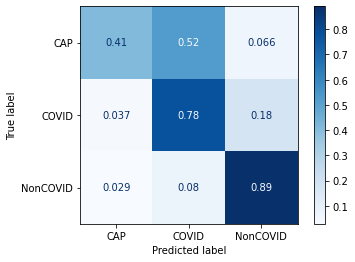

In [97]:
plot_confusion_matrix(lgbm, lgbm_array_validation.reshape(lgbm_array_validation.shape[0], -1), lgbm_label_validation, cmap=plt.cm.Blues, normalize='true')  
plt.show()  

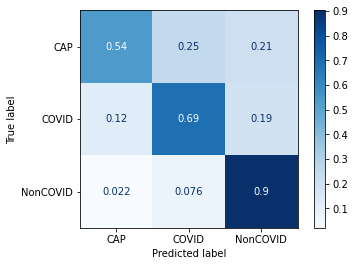

In [98]:
plot_confusion_matrix(lgbm,lgbm_array_test.reshape(lgbm_array_test.shape[0], -1), lgbm_label_test, cmap=plt.cm.Blues, normalize='true')
plt.show()    

In [ ]:
#plot_confusion_matrix(lgbm, y_pred_test, labels=dict_case_lst, cmap=plt.cm.Blues, normalize='true')  
#plt.show() 

In [ ]:
#plot_confusion_matrix_x(lgbm_label_test,y_pred_test,dict_case_lst)